In [15]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


path = '/Users/notagain/Desktop/MLE/sprint4/telecom_churn.csv'

df = pd.read_csv(path).drop(["phone number", 'area code', "state", "voice mail plan", "international plan"], axis=1)
df = df.replace({True: 1, False: 0})


print(df.isna().sum().any())
feats = df.drop('churn', axis=1)
target = df['churn']
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25)

float_cols = df.select_dtypes(include=['float']).columns
scaler = StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])










enc = OneHotEncoder(handle_unknown='ignore')
#Fit the encoder to the training data (X_train) and transform X_train simultaneously
X_train_enc = enc.fit_transform(X_train)


#Also transform the test data (X_test).
#No need to fit the encoder to the test data as it has already been fitted to the training data.
#Simply use the transform() method.
X_test_enc = enc.transform(X_test)


False


In [17]:
target.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [18]:
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)

print('Score on test set:', svm.score(X_test, y_test))

Score on test set: 0.8585131894484412


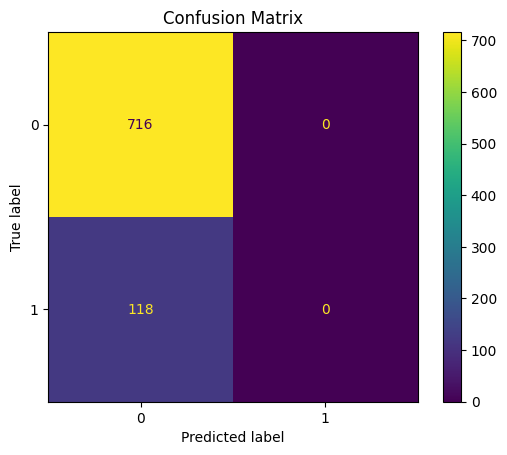

In [19]:
y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')

plt.title("Confusion Matrix")
plt.show()

In [26]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      1.00      0.00      0.92      0.00      0.00       716
          1       0.00      0.00      1.00      0.00      0.00      0.00       118

avg / total       0.74      0.86      0.14      0.79      0.00      0.00       834



/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
print('Oversampled sample classes:', dict(pd.Series(y_ro).value_counts()))

#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)
print('SMOTE sample classes:', dict(pd.Series(y_sm).value_counts()))

Oversampled sample classes: {0: 2134, 1: 2134}
SMOTE sample classes: {0: 2134, 1: 2134}


In [28]:
svm = SVC(gamma='scale')
svm.fit(X_ro, y_ro)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))

print(classification_report_imbalanced(y_test, y_pred))

col_0    0    1
churn          
0      257  459
1       20   98
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.36      0.83      0.52      0.55      0.28       716
          1       0.18      0.83      0.36      0.29      0.55      0.31       118

avg / total       0.82      0.43      0.76      0.49      0.55      0.29       834



In [29]:
svm = SVC(gamma='scale')
svm.fit(X_sm, y_sm)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0    0    1
churn          
0      286  430
1       26   92
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.40      0.78      0.56      0.56      0.30       716
          1       0.18      0.78      0.40      0.29      0.56      0.32       118

avg / total       0.81      0.45      0.73      0.52      0.56      0.30       834



In [30]:
cc = ClusterCentroids()

X_cc, y_cc = cc.fit_resample(X_train, y_train)

print('CC sample classes:', dict(pd.Series(y_cc).value_counts()))

CC sample classes: {0: 365, 1: 365}


In [31]:
svm = SVC(gamma='scale')
svm.fit(X_cc, y_cc)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0    0    1
churn          
0      245  471
1       22   96
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.34      0.81      0.50      0.53      0.27       716
          1       0.17      0.81      0.34      0.28      0.53      0.29       118

avg / total       0.81      0.41      0.75      0.47      0.53      0.27       834



In [32]:
rUs = RandomUnderSampler()

X_ru, y_ru = rUs.fit_resample(X_train, y_train)

print('Undersampled sample classes :', dict(pd.Series(y_ru).value_counts()))

Undersampled sample classes : {0: 365, 1: 365}


In [33]:
svm = SVC(gamma='scale')
svm.fit(X_ru, y_ru)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0    0    1
churn          
0      281  435
1       35   83
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.39      0.70      0.54      0.53      0.27       716
          1       0.16      0.70      0.39      0.26      0.53      0.28       118

avg / total       0.79      0.44      0.66      0.50      0.53      0.27       834



In [36]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()

# Fit and resample the dataset
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)


svm = SVC(gamma='scale')
svm.fit(X_train_resampled, y_train_resampled)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0    0
churn     
0      716
1      118
                   pre       rec       spe        f1       geo       iba       sup

          0       0.86      1.00      0.00      0.92      0.00      0.00       716
          1       0.00      0.00      1.00      0.00      0.00      0.00       118

avg / total       0.74      0.86      0.14      0.79      0.00      0.00       834



/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
svm = SVC(probability=True, gamma='scale') # 'probability=True' is necessary to return probabilities
svm.fit(X_ru, y_ru)                        # but slows down training

threshold = 0.5 # Test with 0.4, 0.6, ...

probs = svm.predict_proba(X_test)
pred_class = (probs[:,1]>=threshold).astype('int')

pd.crosstab(y_test, pred_class)

col_0,0,1
churn,,
0,298,418
1,37,81


In [38]:
svm = SVC(gamma='scale', class_weight='balanced')
svm.fit(X_train, y_train)                         

preds = svm.predict(X_test)

pd.crosstab(y_test, preds)

col_0,0,1
churn,,
0,223,493
1,14,104


In [40]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

X_res, y_res = smt.fit_resample(X_train, y_train)

svm = SVC(gamma='scale')
svm.fit(X_res, y_res)

y_pred = svm.predict(X_test)
print(pd.crosstab(y_test, y_pred))
print(classification_report_imbalanced(y_test, y_pred))

col_0    0    1
churn          
0      265  451
1       23   95
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.37      0.81      0.53      0.55      0.29       716
          1       0.17      0.81      0.37      0.29      0.55      0.31       118

avg / total       0.81      0.43      0.74      0.49      0.55      0.29       834



In [41]:
from imblearn.ensemble import BalancedRandomForestClassifier

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 
y_pred = bclf.predict(X_test)
pd.crosstab(y_test, y_pred)

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to 

col_0,0,1
churn,,
0,580,136
1,24,94
